In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# %load_ext rpy2.ipython

random_state = 1337

In [61]:
df = pd.read_csv('../../data/processed/terran_1984_feb-08-2021_165941.csv', index_col=0)

drop_cols = ['player','frame','race']
df.drop(columns=drop_cols, inplace=True)

categorical_columns = df.columns[[t in ['object','bool'] for t in df.dtypes]]
continuous_columns = df.columns.difference(categorical_columns)

df.head()

,match_id,map_name,region,game_length,enemy_race,ap30s,second,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
0,1,World of Sleepers LE,us,437,P,0.0,0,12,12.0,15.0,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,True
1,1,World of Sleepers LE,us,437,P,235.2,30,13,14.0,15.0,50,727,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,True
2,1,World of Sleepers LE,us,437,P,394.8,60,15,16.0,23.0,65,727,200,1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,0,True
3,1,World of Sleepers LE,us,437,P,400.4,90,17,18.0,23.0,135,867,275,1350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,0,0,0,0,0,1,0,0,0,0,0,True
4,1,World of Sleepers LE,us,437,P,299.6,120,18,19.0,23.0,405,755,200,1475,0,0,48,179,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,True


In [62]:
matched_df = df.groupby(df['match_id']).head(1)
print('Number of matches in this dataframe:', len(matched_df))

Number of matches in this dataframe: 1728


In [63]:
maps = ['Eternal Empire LE', 'Ever Dream LE', 'Deathaura LE']
for enemy_race in ['P','T','Z']:
    for map_name in maps:
        print(len(matched_df[(matched_df.enemy_race == enemy_race) & (matched_df.map_name == map_name)]), enemy_race, map_name)

88 P Eternal Empire LE
83 P Ever Dream LE
56 P Deathaura LE
34 T Eternal Empire LE
33 T Ever Dream LE
17 T Deathaura LE
65 Z Eternal Empire LE
67 Z Ever Dream LE
53 Z Deathaura LE


In [64]:
indexed_df = matched_df[(matched_df.enemy_race == 'Z') & (matched_df.map_name == 'Ever Dream LE')]

In [65]:
match_indexes = indexed_df.match_id.index.to_list()
all_indexes = matched_df.match_id.index.to_list()

pvz_map_df = pd.DataFrame()
pvz_indexes = []

for i, match_index in enumerate(all_indexes):
    if match_index in match_indexes:
        pvz_indexes.append((match_index, all_indexes[i+1]))
        pvz_map_df = pvz_map_df.append(df.iloc[match_index:all_indexes[i+1],:])
        # print(match_index, all_indexes[i+1])

In [66]:
pvz_map_df.drop(columns=['enemy_race','map_name'], inplace=True)
pvz_map_df.head()

,match_id,region,game_length,ap30s,second,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
14269,692,kr,748,0.0,0,12,12.0,15.0,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,False
14270,692,kr,748,243.6,30,13,14.0,15.0,40,699,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,False
14271,692,kr,748,319.2,60,15,16.0,23.0,70,783,200,1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,0,False
14272,692,kr,748,285.6,90,17,18.0,23.0,185,867,275,1350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,0,0,0,0,0,1,0,0,0,0,0,False
14273,692,kr,748,235.2,120,18,19.0,23.0,425,839,200,1475,0,0,48,179,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,False


In [67]:
test_length = int(len(pvz_indexes)*.2)
pvz_map_df_indexes = pvz_map_df.groupby(pvz_map_df['match_id']).head(1)
test_indexes = pvz_map_df_indexes.sample(test_length).match_id.index.to_list()

test_df = pd.DataFrame()
train_df = pd.DataFrame()
all_pvz_map_df_indexes = pvz_map_df_indexes.match_id.index.to_list()

for i, match_index in enumerate(all_pvz_map_df_indexes):
    match_index2 = all_indexes[all_indexes.index(match_index)+1]

    if match_index in test_indexes:
        test_df = test_df.append(pvz_map_df.loc[match_index:match_index2,:])
    else:
        train_df = train_df.append(pvz_map_df.loc[match_index:match_index2,:])

In [68]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

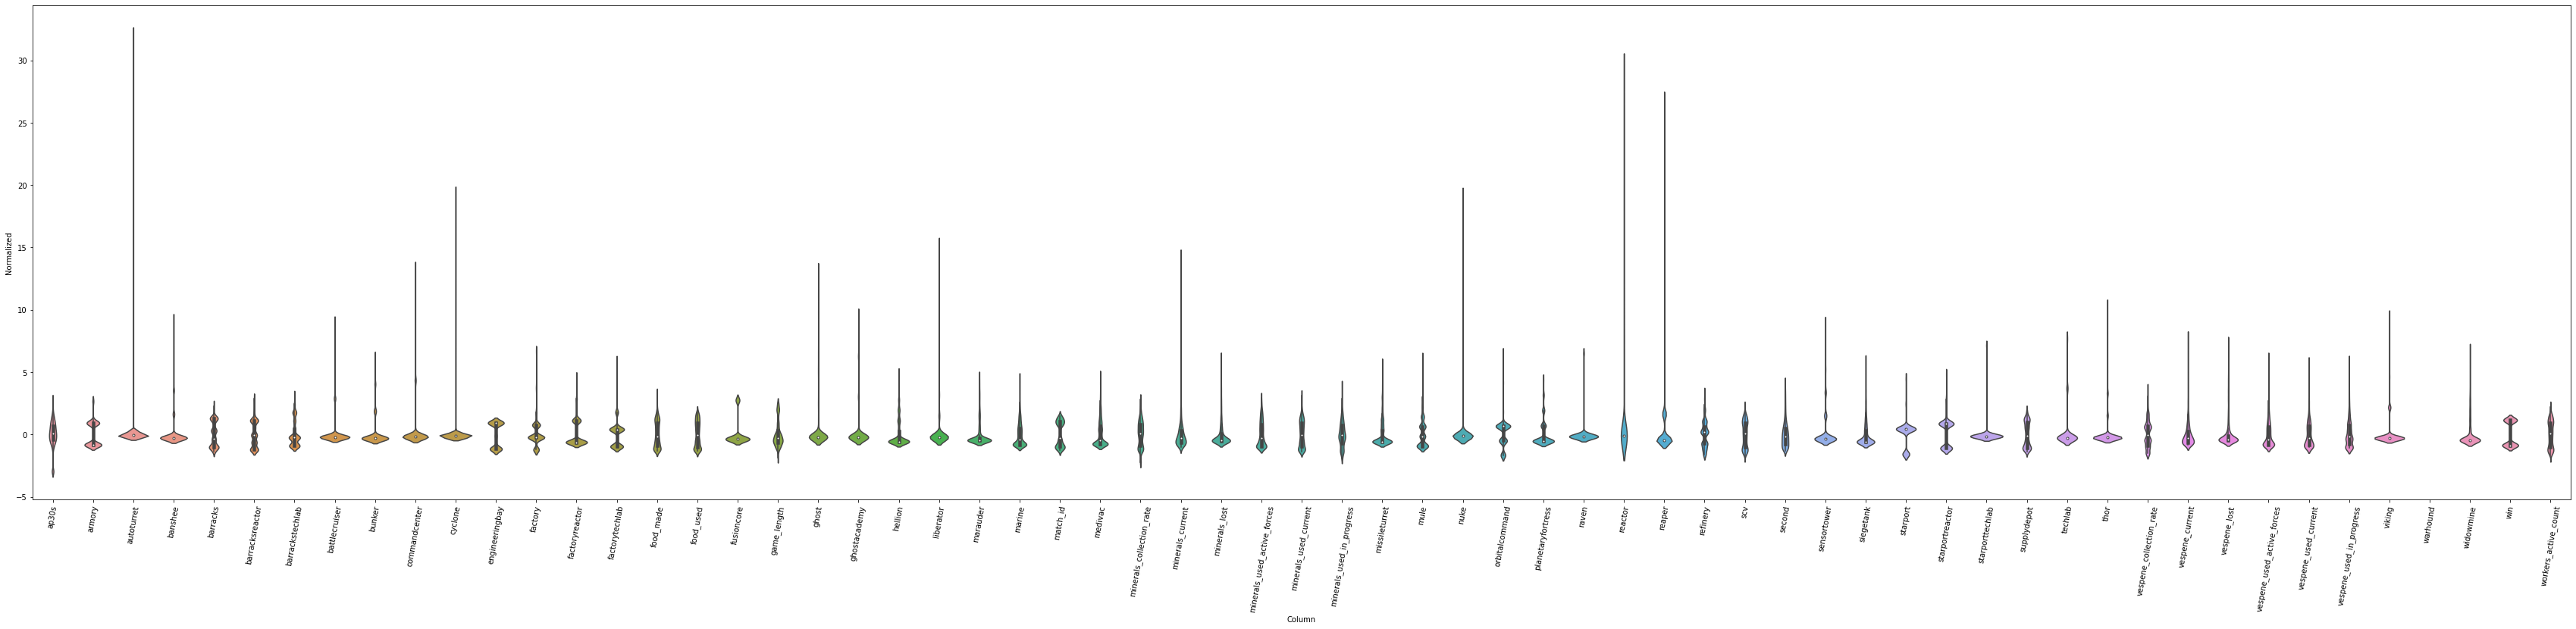

In [69]:
df_std = (pvz_map_df - train_mean) / train_std
df_std = df_std.loc[:,df_std.columns.difference(['region'])].melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(60, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(pvz_map_df.columns.difference(['region']), rotation=80)
plt.show()

In [70]:
grouped_df = pvz_map_df.loc[:, ['match_id', 'game_length', 'region', 'win']]
grouped_df = grouped_df.groupby(grouped_df['match_id']).head(1)

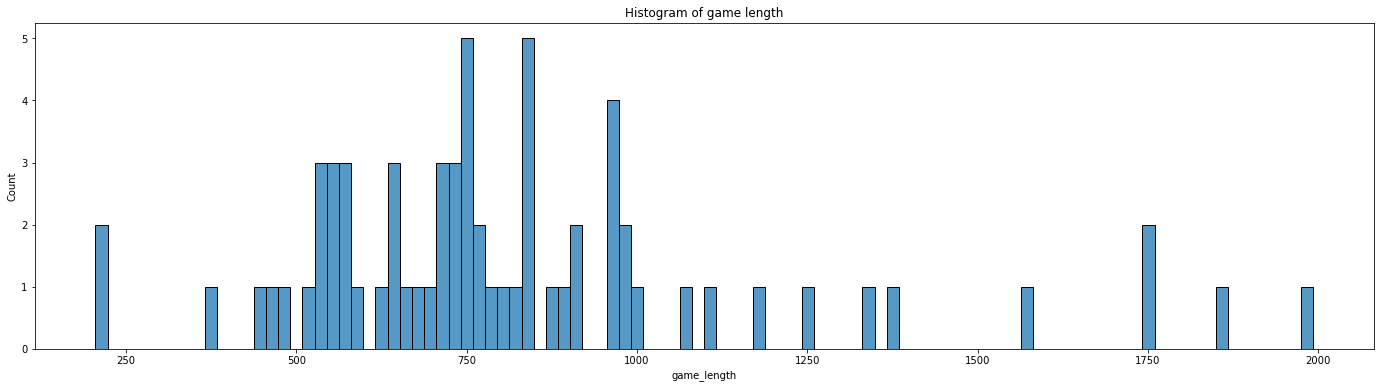

In [71]:
plt.figure(figsize=(24, 6))
ax = sns.histplot(data=grouped_df, x='game_length', bins=100)
plt.title('Histogram of game length')

plt.show()

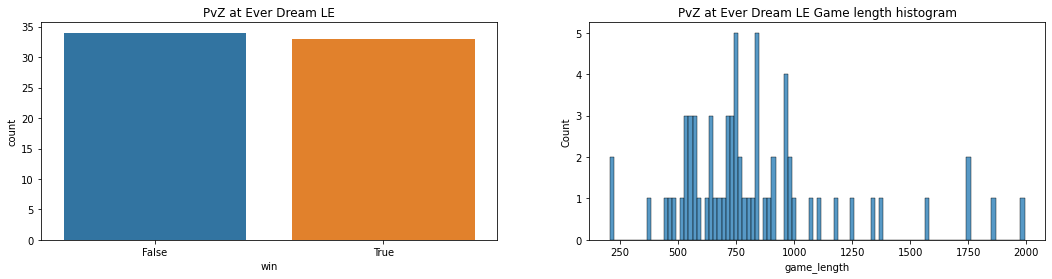

In [72]:
fig = plt.figure(figsize=(18,4))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('PvZ at Ever Dream LE')
ax = sns.countplot(data=grouped_df, x='win', ax=ax)

ax = fig.add_subplot(1,2,2)
ax.title.set_text('PvZ at Ever Dream LE Game length histogram')
sns.histplot(data=grouped_df, x='game_length', bins=100, ax=ax)

plt.show()

In [83]:
counts = df.scv.value_counts()
pd.DataFrame(counts).T

,19,18,15,12,13,23,17,21,25,20,47,46,24,48,22,68,30,44,28,69,26,43,45,70,34,65,49,67,66,62,27,59,71,51,38,63,42,50,60,40,61,72,64,39,41,52,58,74,73,54,33,37,55,36,53,29,56,32,57,31,35,75,76,77,78,81,79,80,82,83,16,84,85,87,86,14,0,89,88,90,93,9,4,8,11,1,2,91,5,6,3,7,95,92,97,10,96,94,104,103,102,99,101
scv,2711,2114,2110,2027,2018,1982,1955,1600,1523,1467,1098,1076,1069,1041,1024,1018,1000,996,990,990,957,954,945,944,940,929,921,912,902,889,885,876,875,865,864,863,857,850,846,842,836,830,826,820,819,806,804,798,789,787,775,772,758,747,743,733,730,729,715,703,685,678,646,622,587,457,456,436,326,258,247,178,144,108,102,89,88,67,59,43,32,31,28,26,25,23,20,19,18,17,16,15,13,13,12,11,5,5,4,3,2,1,1


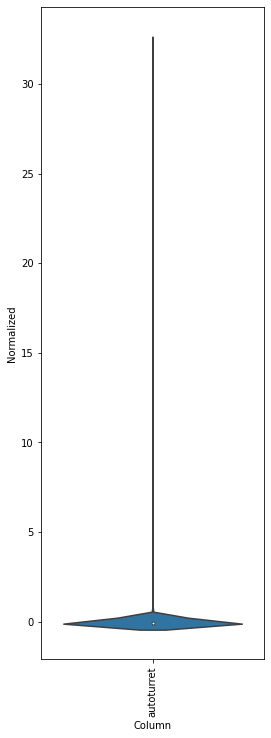

In [79]:
df_std = (pvz_map_df - train_mean) / train_std
df_std = df_std.loc[:,['autoturret']].melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(4, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(['autoturret'], rotation=90)
plt.show()

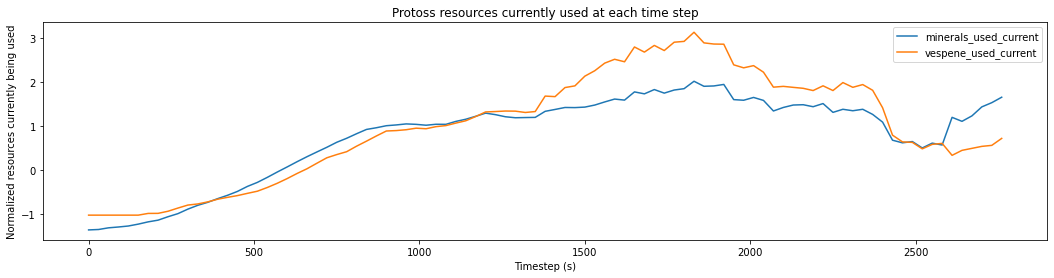

In [74]:
df_std = (pvz_map_df - train_mean) / train_std
df_std['second'] = pvz_map_df.second


plt.figure(figsize=(18,4))

plt.plot(pd.DataFrame(df_std[['second','minerals_used_current']].groupby(['second'])['minerals_used_current'].mean()), label='minerals_used_current')
plt.plot(pd.DataFrame(df_std[['second','vespene_used_current']].groupby(['second'])['vespene_used_current'].mean()), label='vespene_used_current')
plt.legend()
plt.title('Protoss resources currently used at each time step')
plt.ylabel('Normalized resources currently being used')
plt.xlabel('Timestep (s)')

plt.show()

In [75]:
df_std = (pvz_map_df - train_mean) / train_std
df_std['second'] = pvz_map_df.second
df_std['win'] = pvz_map_df.win

df_std.head()

,ap30s,armory,autoturret,banshee,barracks,barracksreactor,barrackstechlab,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,food_made,food_used,fusioncore,game_length,ghost,ghostacademy,hellion,liberator,marauder,marine,match_id,medivac,minerals_collection_rate,minerals_current,minerals_lost,minerals_used_active_forces,minerals_used_current,minerals_used_in_progress,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,region,scv,second,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,vespene_collection_rate,vespene_current,vespene_lost,vespene_used_active_forces,vespene_used_current,vespene_used_in_progress,viking,warhound,widowmine,win,workers_active_count
14269,-2.962086,-0.828643,-0.04653,-0.271467,-1.347455,-1.215248,-0.905508,-0.209505,-0.306134,-0.175858,-0.106961,-1.158485,-1.218471,-0.619118,-0.960991,-1.319774,-1.338923,-0.363419,-0.527335,-0.193457,-0.213334,-0.561473,-0.2167,-0.46635,-0.862152,-1.236206,-0.763191,-2.216619,-0.803652,-0.550799,-1.040876,-1.349727,-1.892527,-0.573184,-0.922821,-0.1268,-1.658298,-0.529371,-0.153582,-0.105665,-0.455178,-1.592299,NaN,-1.567065,0,-0.352011,-0.594952,-1.571883,-1.10034,-0.139926,-1.370591,-0.269459,-0.252132,-1.504984,-0.825836,-0.470603,-0.877057,-1.015394,-1.086362,-0.290202,NaN,-0.454938,False,-1.567065
14270,-0.518250,-0.828643,-0.04653,-0.271467,-1.347455,-1.215248,-0.905508,-0.209505,-0.306134,-0.175858,-0.106961,-1.158485,-1.218471,-0.619118,-0.960991,-1.319774,-1.305028,-0.363419,-0.527335,-0.193457,-0.213334,-0.561473,-0.2167,-0.46635,-0.862152,-1.236206,-0.763191,-1.358523,-0.841003,-0.550799,-1.040876,-1.340240,-1.499171,-0.573184,-0.922821,-0.1268,-1.658298,-0.529371,-0.153582,-0.105665,-0.455178,-1.592299,NaN,-1.516005,30,-0.352011,-0.594952,-1.571883,-1.10034,-0.139926,-1.214812,-0.269459,-0.252132,-1.504984,-0.825836,-0.470603,-0.877057,-1.015394,-1.086362,-0.290202,NaN,-0.454938,False,-1.516005
14271,0.240182,-0.828643,-0.04653,-0.271467,-1.015926,-1.215248,-0.905508,-0.209505,-0.306134,-0.175858,-0.106961,-1.158485,-1.218471,-0.619118,-0.960991,-1.209635,-1.271133,-0.363419,-0.527335,-0.193457,-0.213334,-0.561473,-0.2167,-0.46635,-0.862152,-1.236206,-0.763191,-1.255404,-0.728951,-0.550799,-1.040876,-1.302289,-1.368053,-0.573184,-0.922821,-0.1268,-1.658298,-0.529371,-0.153582,-0.105665,-0.455178,-1.592299,NaN,-1.413885,60,-0.352011,-0.594952,-1.571883,-1.10034,-0.139926,-1.214812,-0.269459,-0.252132,-1.504984,-0.825836,-0.470603,-0.877057,-1.015394,-1.086362,-0.290202,NaN,-0.454938,False,-1.413885
14272,-0.096899,-0.828643,-0.04653,-0.271467,-1.015926,-1.215248,-0.905508,-0.209505,-0.306134,-0.175858,-0.106961,-1.158485,-1.218471,-0.619118,-0.960991,-1.209635,-1.237238,-0.363419,-0.527335,-0.193457,-0.213334,-0.561473,-0.2167,-0.46635,-0.862152,-1.236206,-0.763191,-1.152285,-0.299419,-0.550799,-1.040876,-1.283314,-1.171375,-0.573184,-0.922821,-0.1268,-1.658298,-0.529371,-0.153582,-0.105665,-0.455178,-1.146473,NaN,-1.311765,90,-0.352011,-0.594952,-1.571883,-1.10034,-0.139926,-1.214812,-0.269459,-0.252132,-1.504984,-0.825836,-0.470603,-0.877057,-1.015394,-1.086362,-0.290202,NaN,-0.454938,False,-1.311765
14273,-0.602520,-0.828643,-0.04653,-0.271467,-1.015926,-1.215248,-0.905508,-0.209505,-0.306134,-0.175858,-0.106961,-1.158485,-1.218471,-0.619118,-0.960991,-1.209635,-1.220290,-0.363419,-0.527335,-0.193457,-0.213334,-0.561473,-0.2167,-0.46635,-0.862152,-1.236206,-0.763191,-1.186658,0.596997,-0.550799,-1.040876,-1.259595,-1.368053,-0.573184,-0.922821,-0.1268,-1.658298,-0.529371,-0.153582,-0.105665,-0.455178,-1.146473,NaN,-1.260705,120,-0.352011,-0.594952,-1.571883,-1.10034,-0.139926,-1.214812,-0.269459,-0.252132,-0.920236,-0.669668,-0.470603,-0.877057,-1.015394,-1.086362,-0.290202,NaN,-0.454938,False,-1.260705


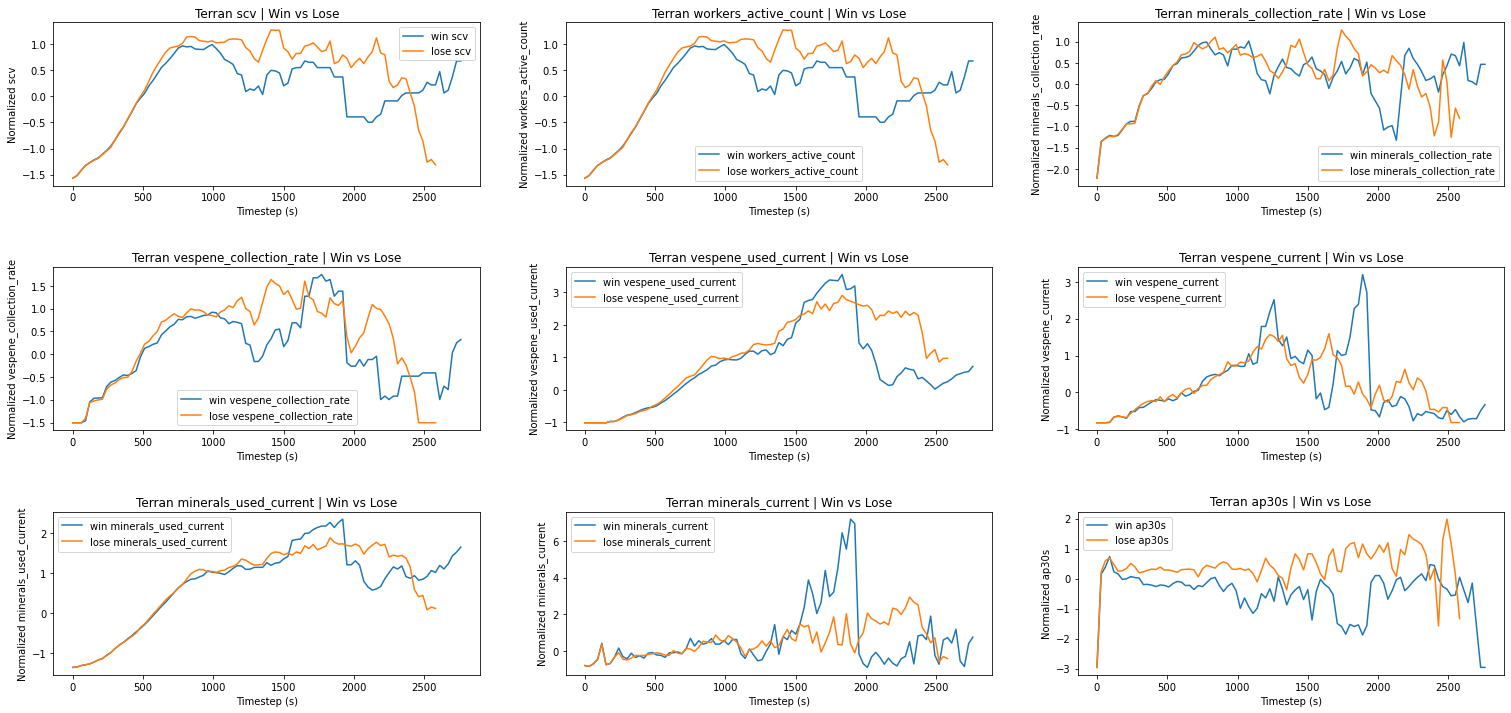

In [76]:
# row, col
shape = (3,3)
fig = plt.figure(figsize=(26,12))

for i, feature in enumerate(['scv','workers_active_count','minerals_collection_rate','vespene_collection_rate','vespene_used_current','vespene_current','minerals_used_current','minerals_current','ap30s']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('Terran {} | Win vs Lose'.format(feature))
    plt.plot(pd.DataFrame(df_std[df_std.win == True][['second',feature]].groupby(['second'])[feature].mean()), label='win {}'.format(feature))
    plt.plot(pd.DataFrame(df_std[df_std.win == False][['second',feature]].groupby(['second'])[feature].mean()), label='lose {}'.format(feature))
    plt.ylabel('Normalized {}'.format(feature))
    plt.xlabel('Timestep (s)')
    ax.legend()


plt.subplots_adjust(hspace=.5)
plt.show()